In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta, date, datetime
import csv
import matplotlib.pyplot as plt

In [3]:
# トリップ数の平均値を計算する関数
def trip_lambda(hour, minute, weekday):
    t = hour + minute/60  # 時間を小数で表現します（例：1時30分 -> 1.5）

    # 平日の場合
    if weekday:
        # 深夜1時まではトリップ数が減少
        if 0 <= hour < 1:
            return 310 - t*110
        # 深夜1時から早朝5時まではトリップ数が安定
        if 1 <= hour < 5:
            return 200
        # 早朝5時から9時までは朝ラッシュでトリップ数が増加
        elif 5 <= hour < 9:
            return 200 + (t-5)*200
        # 9時から11時まではトリップ数が減少
        elif 9 <= hour < 11:
            return 1000 - (t-9)*200
        # 11時から夕方17時まではトリップ数が安定
        elif 11 <= hour < 17:
            return 600
        # 夕方17時から19時までは夕ラッシュでトリップ数が増加
        elif 17 <= hour < 19:
            return 600 + (t-17)*130
        # 19時から深夜24時まではトリップ数が減少
        elif 19 <= hour < 24:
            return 860 - (t-19)*110

    else:  # 休日の場合
        # 以下の時間帯はそれぞれトリップ数のパターンが異なる
        if 0 <= hour < 8:
            return 150
        elif 8 <= hour < 10:
            return 150 + ((hour - 8) * 75 + minute/60 * 75)
        elif 10 <= hour < 18:
            return 300 + ((hour - 10) * 25 + minute/60 * 25)
        elif 18 <= hour < 20:
            return 500 + ((hour - 18) * 50 + minute/60 * 50)
        elif 20 <= hour < 24:
            return 600 - 2*((hour - 20) * 40 + minute/60 * 40)

# トリップ距離を生成する関数


def distance_generator(weekday):
    if weekday:
        # 平日は平均トリップ距離が3km、標準偏差0.03の正規分布に従う
        return round(np.random.normal(3, 0.03), 2)
    else:
        # 休日は平均トリップ距離が3km、標準偏差0.05の正規分布に従う（遠出する可能性があるため標準偏差が大きい）
        return round(np.random.normal(3, 0.05), 2)


# 0時から23時までの時間リストを作成
times = [datetime.strptime(str(i), "%H") for i in range(24)]

# CSVファイルのヘッダー
header = ['weekday', '時間', 'トリップ数', '平均トリップ距離']
data = []

# 各時間帯のデータを生成
for weekday in [1, 0]:  # weekday=1:平日、weekday=0:休日
    for t in times:
        half_hour_intervals = 2  # 30分間隔でデータを生成
        for interval in range(half_hour_intervals):
            # トリップ数の平均値を計算
            lambda_ = trip_lambda(t.hour, 30*interval, weekday)
            # ポアソン分布に基づきトリップ数を生成
            trips = np.random.poisson(lambda_)
            # トリップ距離を生成
            distance = distance_generator(weekday)
            # 行データを作成しリストに追加
            row = [weekday, t.strftime("%H:%M"), trips, distance]
            data.append(row)
            # 次の30分間隔へ
            t += timedelta(minutes=30)

# 生成したデータを表示
data


[[1, '00:00', 313, 2.97],
 [1, '00:30', 274, 3.01],
 [1, '01:00', 205, 3.05],
 [1, '01:30', 203, 3.05],
 [1, '02:00', 216, 2.98],
 [1, '02:30', 207, 2.98],
 [1, '03:00', 208, 2.98],
 [1, '03:30', 198, 3.01],
 [1, '04:00', 221, 3.04],
 [1, '04:30', 183, 3.02],
 [1, '05:00', 199, 3.0],
 [1, '05:30', 316, 3.01],
 [1, '06:00', 413, 2.95],
 [1, '06:30', 501, 2.98],
 [1, '07:00', 604, 3.02],
 [1, '07:30', 743, 3.08],
 [1, '08:00', 769, 3.06],
 [1, '08:30', 893, 3.04],
 [1, '09:00', 998, 2.94],
 [1, '09:30', 894, 2.99],
 [1, '10:00', 771, 3.03],
 [1, '10:30', 686, 3.0],
 [1, '11:00', 597, 2.99],
 [1, '11:30', 614, 3.0],
 [1, '12:00', 583, 3.0],
 [1, '12:30', 590, 3.0],
 [1, '13:00', 576, 2.97],
 [1, '13:30', 606, 2.95],
 [1, '14:00', 632, 2.97],
 [1, '14:30', 581, 2.94],
 [1, '15:00', 611, 2.96],
 [1, '15:30', 631, 3.05],
 [1, '16:00', 635, 2.99],
 [1, '16:30', 599, 3.01],
 [1, '17:00', 623, 2.98],
 [1, '17:30', 713, 3.04],
 [1, '18:00', 673, 2.98],
 [1, '18:30', 780, 2.97],
 [1, '19:00', 870

In [4]:
with open('trip_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data)

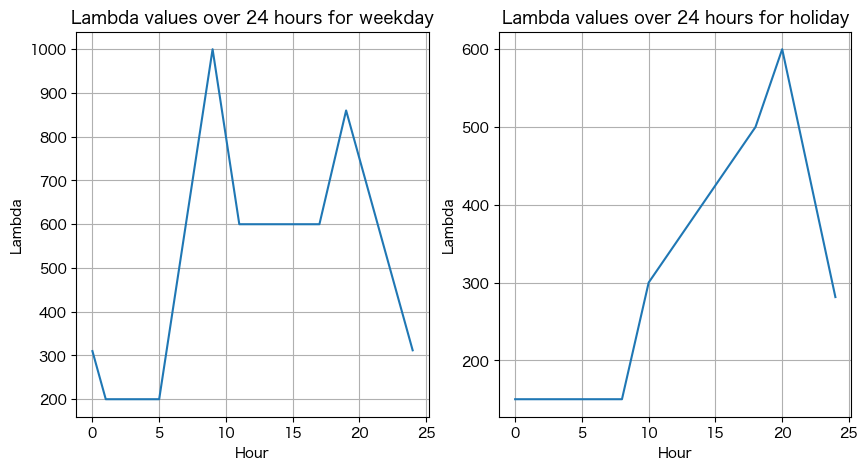

In [7]:
x = []
weekday = []
holiday = []

for hour in range(24):
    for minute in range(60):
        x.append(hour + minute/60)
        weekday.append(trip_lambda(hour, minute, 1))
        holiday.append(trip_lambda(hour, minute, 0))


fig, axs = plt.subplots(1,2, figsize=(10, 5), sharex=True)
axs[0].plot(x, weekday)
axs[1].plot(x, holiday)

for ax, day in zip(axs, ['weekday', 'holiday']):
    ax.set_xlabel('Hour')
    ax.set_ylabel('Lambda')
    ax.set_title(f'Lambda values over 24 hours for {day}')
    ax.grid()
plt.show()

